<a href="https://colab.research.google.com/github/tderr24/MAT-422/blob/main/HW_3_5_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT 422

## HW 3.5/3.6 - K-Means and Support Vector Machines

### Thomas Derr

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import math
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 3.5 K-Means

K-Means is a method of partition $n$ observations into $k$ clusters. In this method, each observation belongs to its nearest centroid (cluster mean). It fails to minimize within regular Euclidian distanfes, and converges to a local optimum quickly, but it is computationally inefficent to outright find the global optimum. It is structured as follows

given $n$ observations $(x_1, x_2, ..., n)$, where each $x_i \in \mathbb{R}^d$

We can then divide these observations into $k (<n)$ sets $S = \{S_1, ..., S_k\}$

Our goal is to minimize the within cluster sum of squares, which is denoted by

$WCSS_i = \sum \limits _{x \in S_i}||x - \mu(S_i)||^2$

this is the squared distance from each poin in a cluster to its centroid

Where the centroid of cluster $i$ is $\mu(S_i) = \frac{1}{|S|} \sum \limits _{x\in S}x$

The overall goal of the algoritm is to find $\arg \min_S \sum \limits _{i=1}^k WCSS_i$

First, We perform this algorithm by starting with $k$ random points in the data being marked as centroids.

Second, We then group the points into $k$ sets based on which centroid is clostest to a given point.

Third, We then calculate the new centroid by minimzing the within cluster sum of squares.

We then repeat steps 2 and 3, assigning points to their nearest centroid then calculating the new centroid until all points stay in the same cluster when running step 2.



Text(0.5, 0.92, '3 Feature Ground Truth of Iris Dataset')

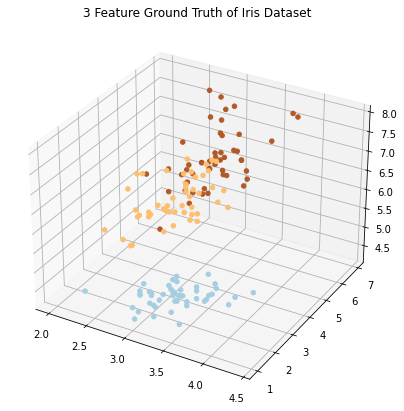

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first two features.
Y = iris.target


z = X[:,0]
x = X[:,1]
y = X[:,2]



fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x, y, z, c=Y, cmap=plt.cm.Paired, alpha=1)
plt.title("3 Feature Ground Truth of Iris Dataset")

In [ ]:
codebook

array([[8.16951065, 7.07855056, 3.08452344],
       [6.92635112, 6.08846957, 2.43240988],
       [6.07817603, 7.94413738, 0.8328423 ]])

/home/nbgrader/spring22/student-accounts/tderr/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 0.92, '3 Feature K-Means Clustering of Iris Dataset')

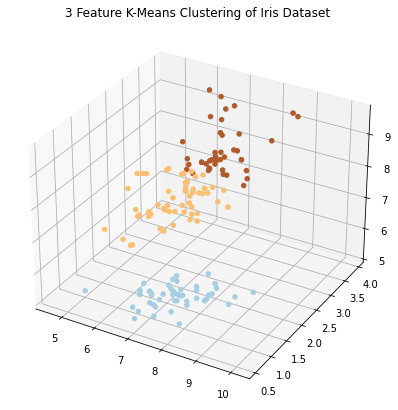

In [ ]:
kmodel = KMeans(n_clusters=3).fit(X)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")


#switch cluster numbers so colors make sense
predictions = [0 for x in range(len(kmodel.labels_))]

for i in range(0, len(kmodel.labels_)):
    if kmodel.labels_[i] == 1:
        predictions[i] = 0
    elif kmodel.labels_[i] == 2:
        predictions[i] = 2
    else:
        predictions[i] = 1

# Creating plot
ax.scatter3D(x, y, z, c=predictions, cmap=plt.cm.Paired, alpha=1)
plt.title("3 Feature K-Means Clustering of Iris Dataset")

As can be seen above, the algorithm seems generally be able to pick out clusters, but cannot necessarily get outliers


### 3.6 Support Vector Machines

An SVM is a supervised learning model whick seeks to classify new data based on where it falls in relation to a hyperplane based on existing data.

Given data in the form $(x_1,y_1), ..., (x_n,y_n) $ hwere each $x_i$ is a $p$ dimensional vector and each $y_i$ is $1$ or $-1$. The goal is to maximize the margin distance of hyperplanes dividing the points where $y = 1$ and the points where $y=-1$.

This forms an optimization problem of the form

$\min \limits _{w,b}(\gamma||w||^2 + \frac{1}{n} \sum \limits _{i=1}^n \max \{0,1 - y_i(<w,x_i> - b)\})$

Where $\gamma||w||^2$ is our regularizer and $\sum \limits _{i=1}^n \max \{0,1 - y_i(<w,x_i> - b)\}$ is our error term

As seen below, this also performs quite well

In [ ]:
df = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.33, random_state=42)

clf = svm.SVC()
clf.fit(X_train, y_train)

y2 = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y2))

Accuracy: 0.9521276595744681
